In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc

In [81]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"


In [2]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"
colnames = ['Preg', 'Glu', 'Bp', 'Sft', 'Ins', 'Bmi', 'Dpf', 'Age', 'Class']
#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list
pima_df = pd.read_csv("prima-indians-diabetes.csv", names= colnames)

In [3]:
pima_df.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
sns.pairplot(pima_df,diag_kind='kde')

/usr/local/anaconda/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [5]:
pima_df.corr()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Sft,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
pima_df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

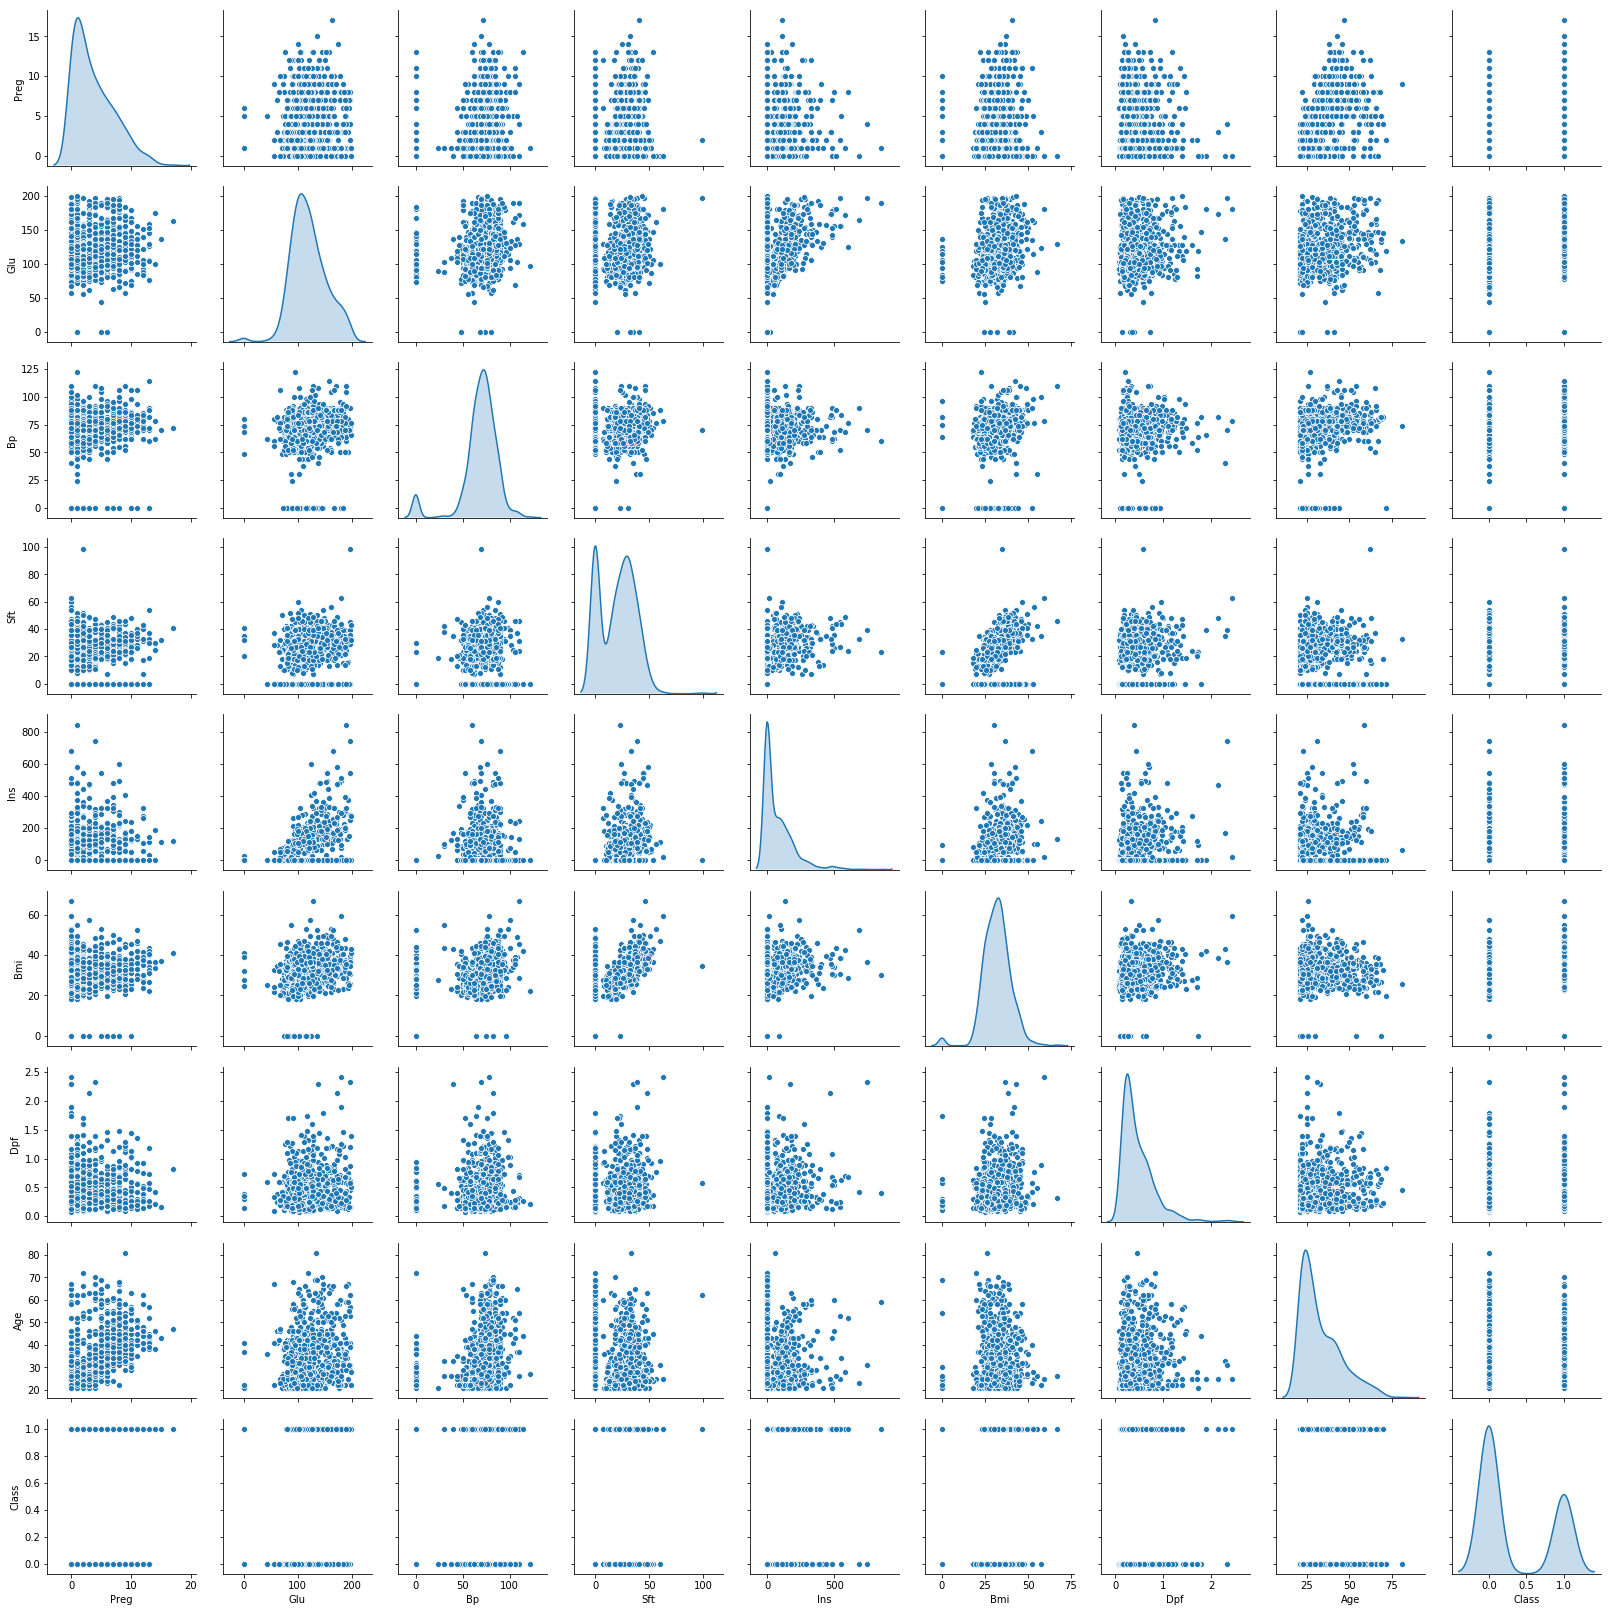

In [87]:
sns.pairplot(pima_df,diag_kind='kde')

In [88]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class


In [89]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
pima_df = pima_df.fillna(pima_df.median())
pima_df.columns

Index(['Preg', 'Glu', 'Bp', 'Sft', 'Ins', 'Bmi', 'Dpf', 'Age', 'Class'], dtype='object')

In [90]:
pima_df.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glu,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Sft,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Ins,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [92]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["Class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age
Class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


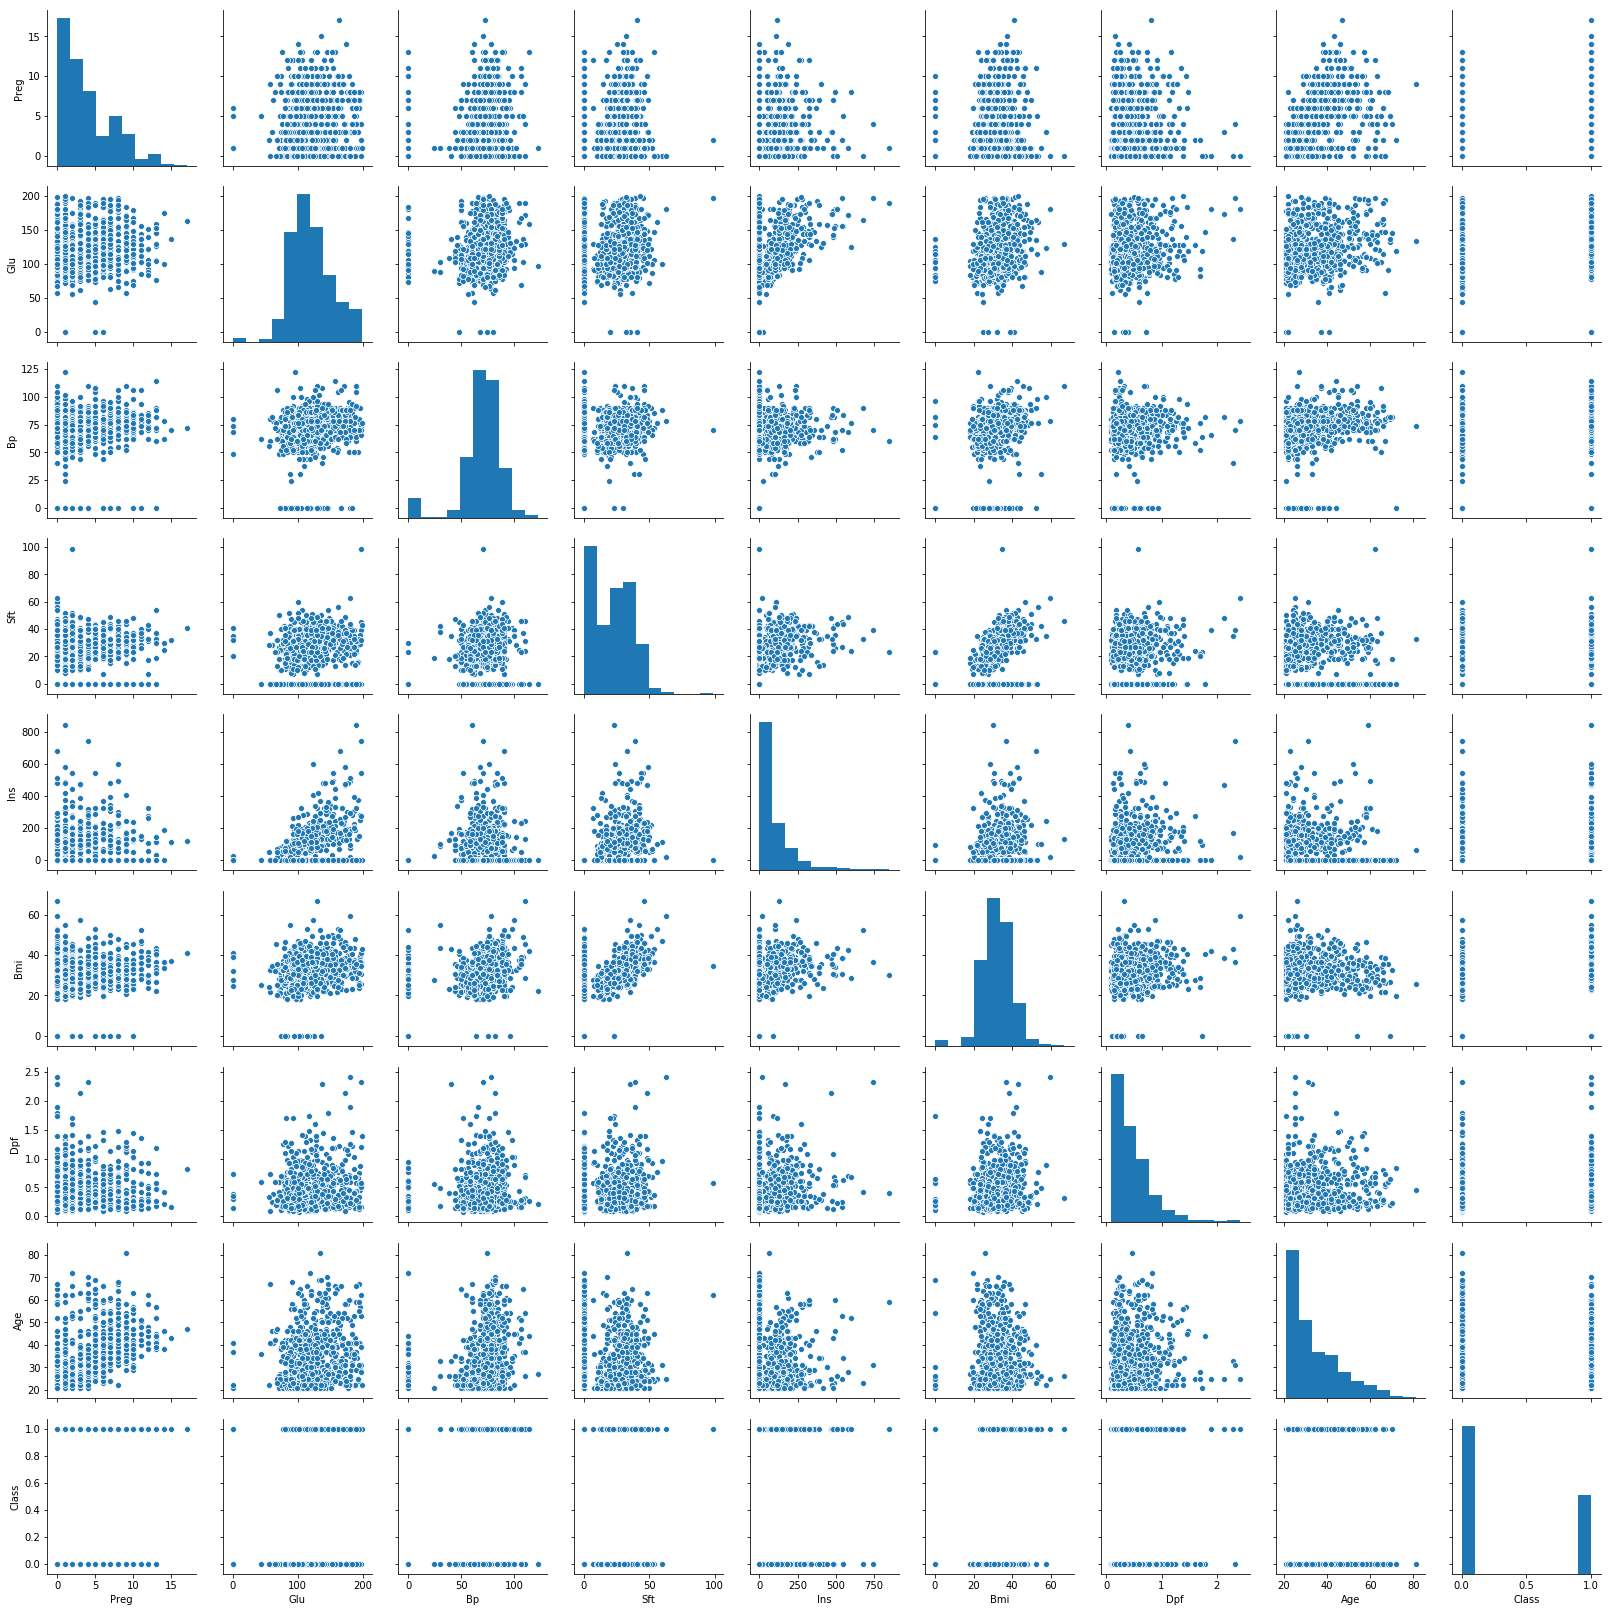

In [95]:
# Pairplot using sns

sns.pairplot(pima_df)

In [96]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


In [97]:
pima_df.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
x=pima_df.drop(['Class','Bp','Sft'],axis=1)
X=pima_df[['Preg', 'Glu', 'Bp', 'Sft', 'Ins', 'Bmi', 'Dpf', 'Age']]
Y=pima_df['Class']
X.shape
Y.shape

(768,)

In [21]:
x.head()

,Preg,Glu,Ins,Bmi,Dpf,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [15]:
#Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
X_train.shape


(537, 8)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=2)

In [23]:
x_train.shape

(537, 6)

In [24]:
y_test.value_counts()

0    155
1     76
Name: Class, dtype: int64

In [19]:
(138+32)/len(Y_test)

0.7359307359307359

In [26]:
# First Model with all 8 attributes
LR1 = LogisticRegression()
LR1.fit(X_train, Y_train)
y1_predict = LR1.predict(X_test)
y1_acc = metrics.accuracy_score(Y_test,y1_predict)
print(y1_acc)
y1_cm=metrics.confusion_matrix(Y_test,y1_predict)
print(y1_cm)

0.7359307359307359
[[138  17]
 [ 44  32]]


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
#Sensitivity
TPR=y1_cm[1,1]/(y1_cm[1,0]+y1_cm[1,1])
TPR

0.42105263157894735

In [29]:
#Specificity
TNR=y1_cm[0,0]/(y1_cm[0,0]+y1_cm[0,1])
TNR

0.8903225806451613

In [31]:
# Second Model with all 6 attributes
LR2 = LogisticRegression()
LR2.fit(x_train, y_train)
y2_predict = LR2.predict(x_test)
y2_acc = metrics.accuracy_score(y_test,y2_predict)
print(y2_acc)
y2_cm=metrics.confusion_matrix(y_test,y2_predict)
print(y2_cm)

0.7186147186147186
[[136  19]
 [ 46  30]]


/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
#Sensitivity
TPR=y2_cm[1,1]/(y2_cm[1,0]+y2_cm[1,1])
TPR

0.39473684210526316

In [33]:
#Specificity
TNR=y2_cm[0,0]/(y2_cm[0,0]+y2_cm[0,1])
TNR

0.8774193548387097

In [30]:
y1_CR=metrics.classification_report(Y_test,y1_predict)
print(y1_CR)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       155
           1       0.65      0.42      0.51        76

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.72      0.74      0.72       231



In [34]:
y2_CR=metrics.classification_report(y_test,y2_predict)
print(y2_CR)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       155
           1       0.61      0.39      0.48        76

   micro avg       0.72      0.72      0.72       231
   macro avg       0.68      0.64      0.64       231
weighted avg       0.70      0.72      0.70       231



In [63]:
# Improve the model -----------------------------Iteration 2 -----------------------------------------------

In [64]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [65]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.7792207792207793
[[134  13]
 [ 38  46]]


    Analyzing the confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 46

True Negatives (TN): we correctly predicted that they don't have diabetes 134

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 13
Falsely predict positive Type I error


False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 38
Falsely predict negative Type II error

0.7295918367346939


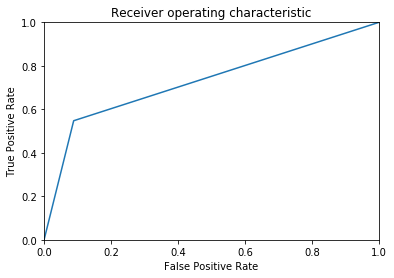

In [67]:
fpr,tpr, _ = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [120]:
pima_df.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
D=np.array(pima_df)

In [117]:
D.shape

(768, 9)

In [104]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=6,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X,Y):
    M=LogisticRegression()
    Xtrain,Xtest=X[train,:],X[test,:]
    Ytrain,Ytest=Y[train],Y[test]
    M.fit(Xtrain,Ytrain)
    Y_predict=M.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
print("Cross-validated Score:%.2f%% " % np.mean(acc))    

Cross-validated Score:0.76% 


In [105]:
acc

[0.7734375, 0.7109375, 0.7421875, 0.7890625, 0.7421875, 0.8125]

In [129]:
err=1-np.array(acc)

In [130]:
np.var(err)

0.0011342366536458333